# HW2
### Import data

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('hw2_data.mat')
X1, X2, Y1, Y2 = mat['X1'], mat['X2'], mat['Y1'], mat['Y2']

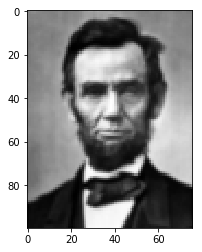

In [3]:
Y1_2D = Y1.reshape(100, 76)
plt.imshow(Y1_2D, cmap='gray')
plt.show()

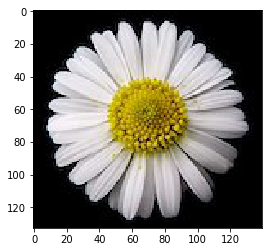

In [4]:
Y2_2D = Y2.reshape(133, 140, 3)/255
plt.imshow(Y2_2D)
plt.show()

### Define Network

In [10]:
class Network():
    def __init__(self):
        self.layers = (
            Linear(2, 128),
            sigmoid(),
            Linear(128, 256),
            sigmoid(),
            Linear(256, 3),
            sigmoid()
        )
        self.depth = len(self.layers)
        self.sequential()  
        self.lr = 0.001
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.eps = 1e-8
       
    def sequential(self):
        for i in range(1, self.depth):
            if isinstance(self.layers[i], Linear):
                self.layers[i].prev = self.layers[i-1]

    def forward(self, x):
        self.out = x
        for i in range(self.depth):
            self.out = self.layers[i].forward(self.out)
    
    def backward(self, ground_truth):
        gradient = (self.out - ground_truth) #/ self.out.shape[0]
        for i in range(self.depth):
            gradient = self.layers[self.depth - i - 1].backward(gradient)

    def update(self):
        for i in range(self.depth):
            if isinstance(self.layers[i], Linear):
                #self.layers[i].w -= self.lr * self.layers[i].dw
                #self.layers[i].b -= self.lr * self.layers[i].db
                self.layers[i].m_w = self.beta1 * self.layers[i].m_w + (1-self.beta1) * self.layers[i].dw
                self.layers[i].v_w = self.beta2 * self.layers[i].v_w + (1-self.beta2) * (self.layers[i].dw ** 2)
                self.layers[i].w -= self.lr * self.layers[i].m_w / (self.layers[i].v_w ** (1/2) + self.eps)
                
                self.layers[i].m_b = self.beta1 * self.layers[i].m_b + (1-self.beta1) * self.layers[i].db
                self.layers[i].v_b = self.beta2 * self.layers[i].v_b + (1-self.beta2) * (self.layers[i].db ** 2) 
                self.layers[i].b -= self.lr * self.layers[i].m_b / (self.layers[i].v_b ** (1/2) + self.eps)                
                
    
    def loss(self, ground_truth):
        loss = self.out - ground_truth
        loss = np.sum(loss ** 2) / 2 / loss.shape[0]
        return loss
    
def total_loss(x, y):
    nn.forward(x)
    loss = nn.out - y
    loss = np.sum(loss ** 2) / 2 / loss.shape[0]
    return loss
    
class Linear():
    def __init__(self, input_size, output_size):
        self.prev = None
        self.result = None
        self.w = np.random.normal(0, 1, [input_size, output_size])
        #self.b = np.random.normal(0, 1, output_size)
        self.b = np.zeros(output_size)
        self.m_w = np.zeros([input_size, output_size])
        self.v_w = np.zeros([input_size, output_size])
        self.m_b = np.zeros(output_size)
        self.v_b = np.zeros(output_size)        
    def forward(self, x):
        self.result = np.dot(x, self.w) + self.b
        self.x = x
        return self.result
    def backward(self, gradient):
        self.dw = np.dot(self.x.T, gradient) / self.x.shape[0]
        self.db = np.sum(gradient, axis=0)   / self.x.shape[0]
        self.dx = np.dot(gradient, self.w.T)
        return self.dx

class sigmoid():
    def forward(self, x):
        self.result = 1 / (1 + np.e**(-x))
        return self.result
    def backward(self, gradient):
        return gradient * self.result * (1 - self.result)

In [ ]:
def draw():
    nn.forward(X2)
    Y2_pred = nn.out
    Y2_pred = Y2_pred.reshape(133, 140, 3)
    plt.imshow(Y2_pred)
    plt.show()            

epoch_num = 4000
batch_size = 1024
batch_num = X2.shape[0] // batch_size
nn = Network()
X2_2 = X2
Y2_2 = Y2/255
loss = 1
e = 0
index = np.arange(X2.shape[0])


#for e in range(epoch_num):#epoch_num
while loss > 0.029:
    np.random.shuffle(index)
    X2_2 = X2_2[index]
    Y2_2 = Y2_2[index]
    for b in range(batch_num):#batch_size
        nn.forward(X2_2[batch_size * b : batch_size * b + batch_size])
        nn.backward(Y2_2[batch_size * b : batch_size * b + batch_size])
        nn.update()
        #print(nn.loss(Y2_2[batch_size * b : batch_size * b + batch_size]))
    e += 1
    if e % 50 == 0:
        loss = total_loss(X2, Y2/255)
        print('Epoch:',e, 'Loss:', loss)
    if e % 1000 == 0:
        draw()